Fit OK.


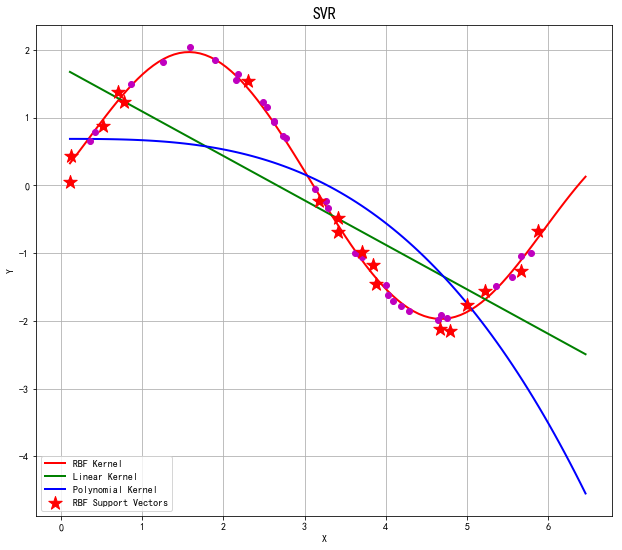

#2 随机数的SVR回归拟合

验证参数：
 {'gamma': 0.59948425031894093, 'C': 35.938136638046259}


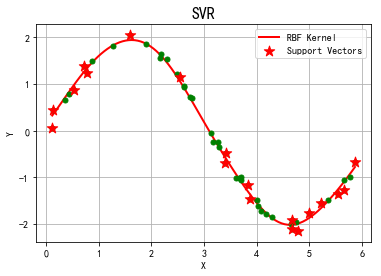

#3 SVR拟合随机数曲线

/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fit OK.


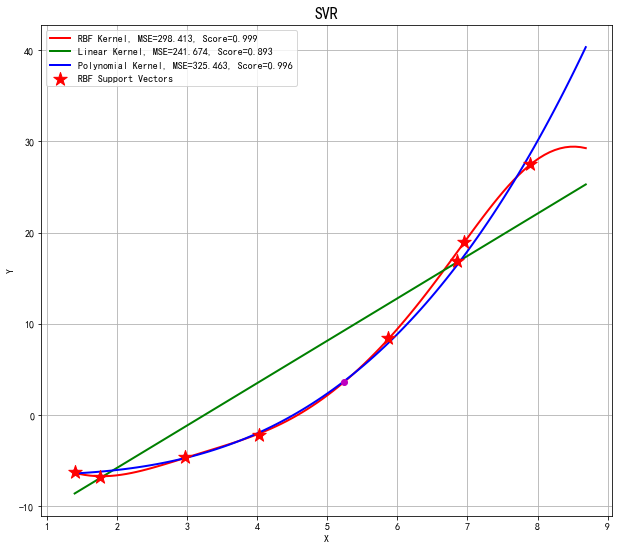

In [11]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
svr_rbf.fit(x, y)

svr_linear = svm.SVR(kernel='linear', C=100)
svr_linear.fit(x, y)

svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(x, y)
print('Fit OK.')

# 思考：系数1.1改成1.5
x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)

plt.figure(figsize=(9, 8), facecolor='w')
mse = np.average((y_rbf - np.array(y)) ** 2)
s = svr_rbf.score(x, y)
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel, MSE=%.3f, Score=%.3f' % (mse,s))
mse = np.average((y_linear - np.array(y)) ** 2)
s = svr_linear.score(x, y)
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel, MSE=%.3f, Score=%.3f' % (mse,s))
mse = np.average((y_poly - np.array(y)) ** 2)
s = svr_poly.score(x, y)
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel, MSE=%.3f, Score=%.3f' % (mse,s))
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=200, c='r', marker='*', label='RBF Support Vectors', zorder=10)
plt.legend(loc='upper left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.tight_layout(2)
plt.show()